### Logistic Regression

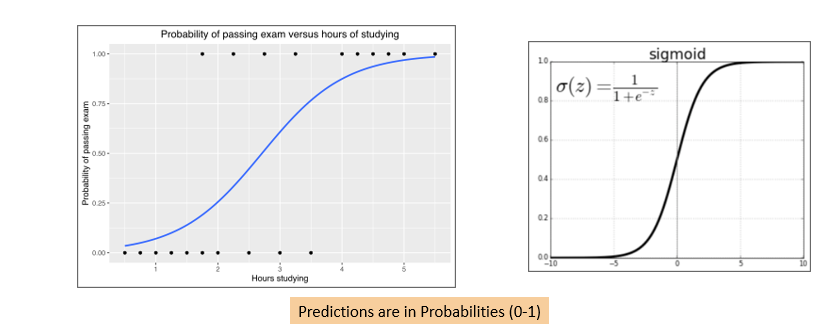

In [63]:
from warnings import filterwarnings

filterwarnings("ignore")

### Step 1 :- Data Ingestion

In [64]:
import pandas as pd

df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Target feature is Species

In [65]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Beacause i have 3 species it is multiclass classification

## Step 2 :- Perform Basic Data Quality

In [66]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [67]:
df.duplicated().sum()

np.int64(1)

In [68]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df.shape

(149, 5)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### Step 3 :- Separate X and Y 

In [70]:
X = df.drop(columns=["species"])
Y = df[["species"]]

In [71]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [72]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [73]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

In [74]:
Y_pre.value_counts()

species
0.0        50
1.0        50
2.0        49
Name: count, dtype: int64

## Step 4 :- Apply Preprocessing on X 

In [75]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [76]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [77]:
num_pipe = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler()).set_output(
    transform="pandas"
)

In [78]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624


## Step 5 :- Train Test Split

In [79]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.2, random_state=21
)

In [80]:
ytrain.head()

,species
41,setosa
130,virginica
70,versicolor
46,setosa
125,virginica


In [81]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [82]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
92,-0.052682,-1.057157,0.142468,0.007064
44,-0.898033,1.702254,-1.049462,-1.045486
7,-1.018798,0.782450,-1.276496,-1.308624
21,-0.898033,1.472303,-1.276496,-1.045486
95,-0.173447,-0.137353,0.255985,0.007064


In [83]:
xtrain.shape

(119, 4)

In [84]:
xtest.shape

(30, 4)

# Step 6 :- Model Building

In [85]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [86]:
model.intercept_

array([-0.20389787,  1.95984752, -1.75594965])

In [87]:
model.coef_

array([[-1.01325141,  1.0800148 , -1.80616049, -1.74296429],
       [ 0.52221023, -0.31349382, -0.39895492, -0.65956736],
       [ 0.49104118, -0.76652098,  2.20511541,  2.40253165]])

### Step 7 :- Model Evaluation

In [88]:
model.score(xtrain, ytrain)

0.9831932773109243

In [89]:
model.score(xtest, ytest)

0.9333333333333333

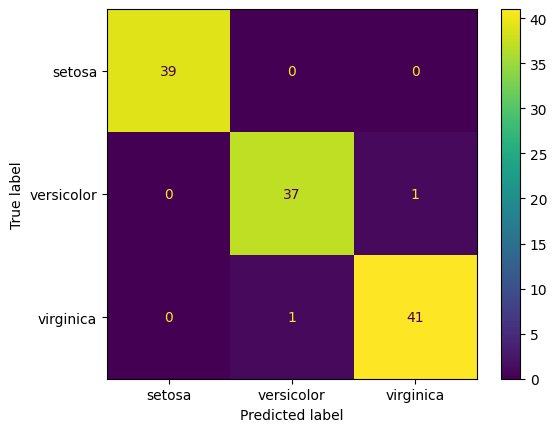

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, xtrain, ytrain)

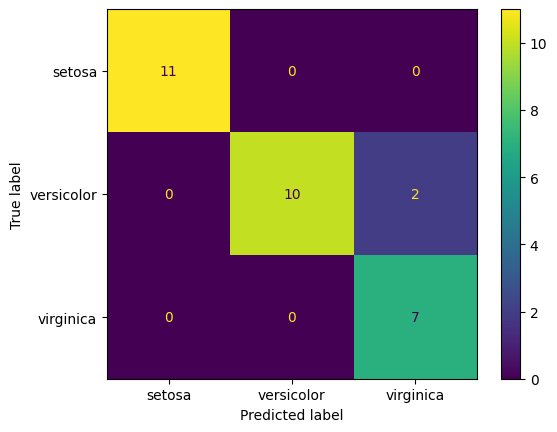

In [91]:
ConfusionMatrixDisplay.from_estimator(model, xtest, ytest)

In [92]:
ypred_test = model.predict(xtest)
ypred_test[0:5]

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor'],
      dtype=object)

In [94]:
ytest.head()

,species
92,versicolor
44,setosa
7,setosa
21,setosa
95,versicolor


In [97]:
yprob_test = model.predict_proba(xtest)
yprob_test[0:5].round(4)

array([[0.0214, 0.9247, 0.0539],
       [0.9852, 0.0148, 0.    ],
       [0.976 , 0.024 , 0.    ],
       [0.9852, 0.0148, 0.    ],
       [0.0754, 0.8791, 0.0456]])

In [95]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.83      0.91        12
   virginica       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [98]:
from sklearn.metrics import f1_score

f1_score(ytest, ypred_test, average="macro")

0.9280303030303031

In [99]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="f1_macro", n_jobs=-1)
scores

array([0.95681511, 0.95816993, 1.        , 1.        , 0.91666667])

In [100]:
scores.mean()

np.float64(0.9663303432034083)

### Above results confirm that this is a good model 

### Step 8 :- Out of Sample Prediction

In [101]:
xnew = pd.read_csv("iris_sample.csv")
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8


In [102]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [103]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.414976,-1.287108,0.142468,0.138633
1,1.275726,0.092598,0.766812,1.454321
2,-0.898033,-1.287108,-0.425118,-0.124505
3,-1.743384,-0.367304,0.000000,-1.308624
4,0.068082,-0.137353,0.766812,0.796477


In [104]:
preds = model.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [105]:
probs = model.predict_proba(xnew_pre).round(4)
probs

array([[2.270e-02, 8.902e-01, 8.710e-02],
       [1.000e-04, 6.580e-02, 9.341e-01],
       [1.352e-01, 8.561e-01, 8.700e-03],
       [8.051e-01, 1.948e-01, 1.000e-04],
       [3.800e-03, 3.131e-01, 6.831e-01],
       [9.630e-01, 3.700e-02, 0.000e+00],
       [1.452e-01, 8.298e-01, 2.500e-02],
       [4.000e-04, 1.530e-01, 8.466e-01],
       [9.839e-01, 1.610e-02, 0.000e+00],
       [8.910e-01, 1.089e-01, 1.000e-04],
       [2.000e-02, 9.159e-01, 6.410e-02],
       [3.410e-02, 9.462e-01, 1.970e-02],
       [0.000e+00, 1.470e-02, 9.853e-01],
       [3.300e-03, 7.016e-01, 2.951e-01],
       [6.000e-04, 4.368e-01, 5.626e-01]])

In [106]:
xnew["species_pred"] = preds
probs

array([[2.270e-02, 8.902e-01, 8.710e-02],
       [1.000e-04, 6.580e-02, 9.341e-01],
       [1.352e-01, 8.561e-01, 8.700e-03],
       [8.051e-01, 1.948e-01, 1.000e-04],
       [3.800e-03, 3.131e-01, 6.831e-01],
       [9.630e-01, 3.700e-02, 0.000e+00],
       [1.452e-01, 8.298e-01, 2.500e-02],
       [4.000e-04, 1.530e-01, 8.466e-01],
       [9.839e-01, 1.610e-02, 0.000e+00],
       [8.910e-01, 1.089e-01, 1.000e-04],
       [2.000e-02, 9.159e-01, 6.410e-02],
       [3.410e-02, 9.462e-01, 1.970e-02],
       [0.000e+00, 1.470e-02, 9.853e-01],
       [3.300e-03, 7.016e-01, 2.951e-01],
       [6.000e-04, 4.368e-01, 5.626e-01]])

In [107]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [108]:
xnew["species_pred"] = preds
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred
0,5.5,2.5,4.0,1.3,versicolor
1,6.9,3.1,5.1,2.3,virginica
2,5.1,2.5,3.0,1.1,versicolor
3,4.4,2.9,NaN,0.2,setosa
4,5.9,3.0,5.1,1.8,virginica
5,5.5,3.5,1.3,0.2,setosa
6,5.6,NaN,3.6,1.3,versicolor
7,6.5,3.0,5.2,2.0,virginica
8,5.3,3.7,1.5,0.2,setosa
9,5.1,3.4,1.5,NaN,setosa


In [109]:
xnew[model.classes_] = probs
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0227,0.8902,0.0871
1,6.9,3.1,5.1,2.3,virginica,0.0001,0.0658,0.9341
2,5.1,2.5,3.0,1.1,versicolor,0.1352,0.8561,0.0087
3,4.4,2.9,NaN,0.2,setosa,0.8051,0.1948,0.0001
4,5.9,3.0,5.1,1.8,virginica,0.0038,0.3131,0.6831
5,5.5,3.5,1.3,0.2,setosa,0.9630,0.0370,0.0000
6,5.6,NaN,3.6,1.3,versicolor,0.1452,0.8298,0.0250
7,6.5,3.0,5.2,2.0,virginica,0.0004,0.1530,0.8466
8,5.3,3.7,1.5,0.2,setosa,0.9839,0.0161,0.0000
9,5.1,3.4,1.5,NaN,setosa,0.8910,0.1089,0.0001


In [110]:
xnew.to_csv("Results.csv", index=False)

### Step 9 :-Save the Model and Preprocessor

In [111]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [112]:
model

LogisticRegression()

In [113]:
import joblib

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [116]:
joblib.dump(model, "iris_model.joblib")

['iris_model.joblib']

## Load the Preprocessor and Model

In [118]:
p = joblib.load("pre.joblib")
p

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [119]:
m = joblib.load("iris_model.joblib")
m

LogisticRegression()

In [120]:
m.score(xtrain, ytrain)

0.9831932773109243

In [121]:
m.score(xtest, ytest)

0.9333333333333333